# BRITE Constellation - Sky Map
---
**Tutorial:** The following python script uses data from the BRITE-Constellation public lightcurve archive to help users plot the celestial coordinates provided in the header of the file. The following will detail how to extract the coordinates (as done in the BRITE Constellation main tutorial) and plot them on a map of the sky. 

**Mission & Instrument:** BRITE-Constellation, data in this tutorial is taken by the nanosatellite BRITE-Austria

**About the Mission:** The BRITE-Constellation mission consists of five BRIght Target Explorer (BRITE) nanosatellites (three are active as of Sept 2023). Each of the following countries built two satellites, Austria, Canada, and Poland. The six nanosatellites were scheduled to launch between February 2013 and August 2014. However, BRITE-Montreal was unable to ever launch so only 5 of the 6 were operational. The focus of the mission is collect data using optical photometry to learn about stellar struture, evolution, and interactions with the surrounding environment. More information can be found here, https://brite-constellation.at/. 

**System Requirements:** Access to Internet, Python Version 3.9 or above

**Tutorial Level**: Intermediate

---

**Acknowledgment**: Based on data collected by the BRITE Constellation satellite mission, designed, built, launched, operated and supported by the Austrian Research Promotion Agency (FFG), the University of Vienna, the Technical University of Graz, the Canadian Space Agency (CSA), the University of Toronto Institute for Aerospace Studies (UTIAS), the Foundation for Polish Science & Technology (FNiTP MNiSW), and National Science Centre (NCN).

**Credits**: The sky atlas diagram used in this tutorial was created by Richard Powell from the website [An Atlas of The Universe](http://www.atlasoftheuniverse.com/index.html) and is licensed under a Creative Commons Attribution-ShareAlike 2.5 License. More information can be read [here](http://www.atlasoftheuniverse.com/copyright.html). The image of the Cosmic Microwave Background (CMB) was taken by the European's Space Agency's Planck satellite. 

**Note: The coordinates provided are of the general area/field the star is located in and not of the star itself.** \
In addition, the accuracy of these coordinates are uncertain.

In [1]:
#Import libraries
from astropy.coordinates import SkyCoord, Galactic
from astropy.visualization import astropy_mpl_style
from imageio.v2 import imread
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd


#### User Inputs

In [8]:
#Name of downloaded .dat file, change this to the file you have saved <str>
# Remember to include the ".dat" at the end
FileName = "HD31237_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat"

#Define the desired project <str>
# 'aitoff' is the recommended projection
proj = "aitoff"

#Parameters for plot <int>
X = 13       # Width of the graph
Y = 10       # Height of the graph 

### Extract Data
Start by extracting the name of the star and the celestial coordinates from the header of the lightcurve file.  

**Celestial coordinates:** Our coordinate system of longitude and latitude is Earth-centric (or geocentric) and therefore can't be applied to stars or planets. Instead a celestial coordinate system has been developed that uses *right ascension (RA)* in place of longitude and *declination (DEC)* in place of latitude.  

In [9]:
Path = os.path.realpath(FileName)
DataFrame = pd.read_csv(Path, sep = " ,", on_bad_lines = 'skip', engine = "python", header = None)

# Print Info About Dataset / Print Dataset Header
print ("Header Information")
print (pd.DataFrame(DataFrame.iloc[:37]).to_markdown())

print ()
print ("Data Information")
print (pd.DataFrame(DataFrame.iloc[37:46]).to_markdown())
print ()
# Extract name of star
StarInfo = DataFrame.iloc[6]
StarInfo['new'] = StarInfo.str.split(',').str[0]   
for i in ((np.array(StarInfo['new']))):
    s1 = slice(12, len(i))
    StarName = i[s1]
print ("The name of the star is", StarName)

#Extract RA (Right Acension) and DEC (Declination) of the field (also known as the celestial coordinates)
RA_Info = DataFrame.iloc[8]
DEC_Info = DataFrame.iloc[9]

RA_Info['new'] = RA_Info.str.split('/').str[0] 
for i in (np.array(RA_Info['new'])):
    s1 = slice(13, len(i))
    RA = float(i[s1]) #value of right acension/RA

DEC_Info['new'] = DEC_Info.str.split('/').str[0] 
for i in (np.array(DEC_Info['new'])):
    s1 = slice(13, len(i))
    DEC = float(i[s1]) #value of declination/DEC
print ("The field celestial coordinates are, right acension (RA) is ", RA," and the declination (DEC) is", DEC ," in degrees")

Header Information
|    | 0                                                                                                                                           |
|---:|:--------------------------------------------------------------------------------------------------------------------------------------------|
|  0 | c start header ----------------------------------------------------------------------------                                                 |
|  1 | c OFilName= HD31237_01-Ori-I-2013_BAb_setup3_APa2s5_DR2.dat       / file name after reformatting                                            |
|  2 | c IFilName= 07_HD31237.dat       / input file name                                                                                          |
|  3 | c IFilSetN= setup3     /setup directory name                                                                                                |
|  4 | c IFilSetF= Setup_131201_150541_26ba.xml     /setup file name                   

### Plot Celestial Coordinates
First we'll plot on a sky atlas.

In [10]:
## Function for converting right ascenion (RA)
def convert_coords (ra):
    """ Converts the provided coordinate given in radians to be usable on a sky map for plotting. 
        Preferable for x-coordinate/longitude/right ascencion. Y-coordinates/latitude/declination does not
        need to be converted. 

    :param ra: the provided right ascension coordinate in radians
    :type ra: float
    
    :returns ra_convert: the converted coordinates for right ascenion in radians
    :rtype ra_convert: float"""

    # Convert the right ascenion to allow it to wrap around map
    ra_convert = 0
    if ra > (np.pi):
        ra_convert = -1 * ((ra % (np.pi)) - (np.pi)) 
    else:
        ra_convert = -1 * ra
    
    return (ra_convert)

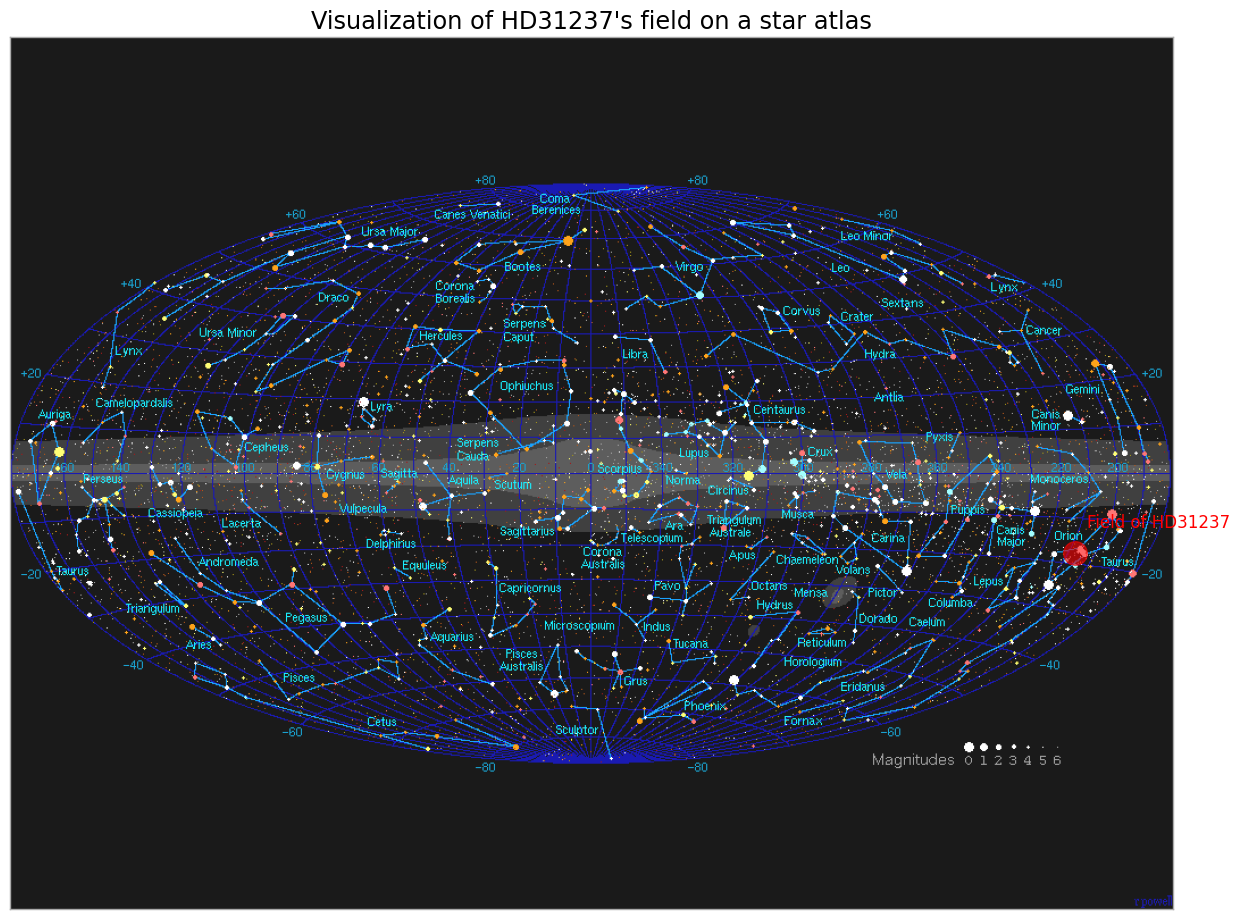

In [11]:
### Star Atlas Plot ####

star_atlas_url = "http://www.atlasoftheuniverse.com/galchart.gif"

#Initialize plot
img = imread(star_atlas_url)
plt.style.use(astropy_mpl_style)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.imshow(img, alpha = 0.9)

ax2 = fig.add_subplot(projection = "aitoff")

#Implement object and convert to galactic units
object = SkyCoord(RA, DEC, unit = 'deg')
object_ra = (convert_coords(object.galactic.l.rad))
object_dec = object.galactic.b.rad

#Plot object
ax2.plot(object_ra, object_dec, marker = 'o', markersize = 17, color = 'red', alpha = 0.6)
ax2.text(object_ra, object_dec + 0.1, "Field of " + StarName, color = "red") #Add name of the star

plt.axis("off")
ax.grid(False)
ax.set_title("Visualization of " + StarName + "'s field on a star atlas")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

Now we'll make a plot on a map of the universe with CMB behind it. We'll be using an image created by the ESA's Planck Satellite.

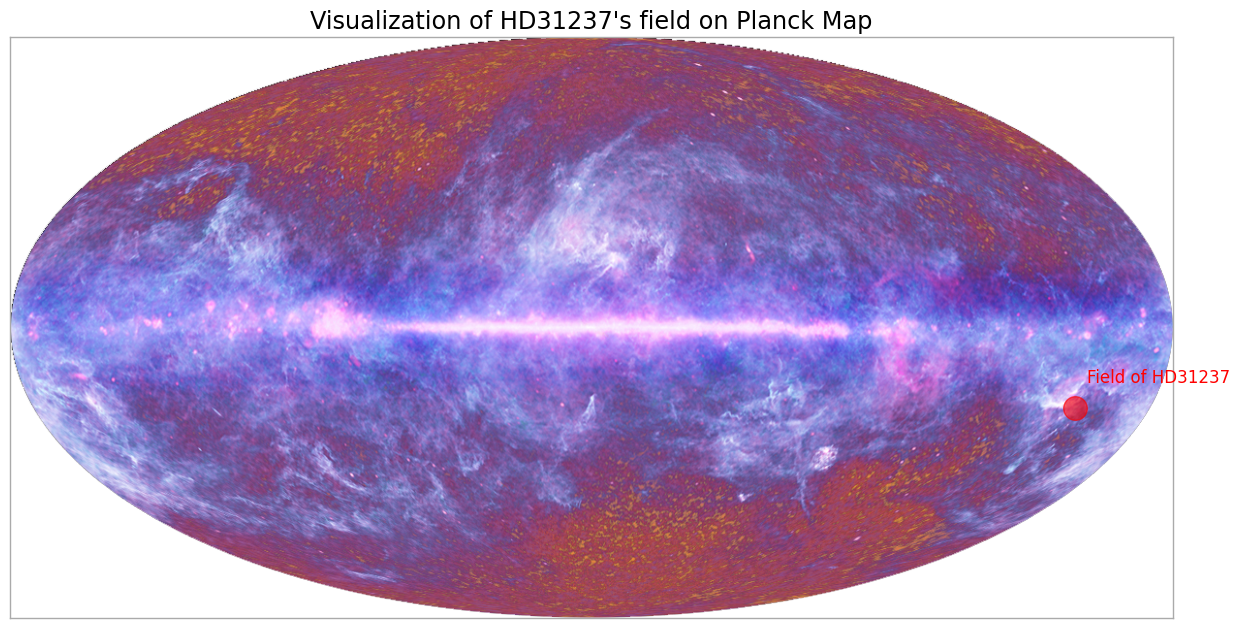

In [12]:
cmb_url = 'https://plancksatellite.org.uk/wp-content/uploads/sites/2/2019/09/PLANCK_FSM_03_cropped_0.png'

#Initialize plot
img = imread(cmb_url)
plt.style.use(astropy_mpl_style)
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
ax.imshow(img, alpha = 0.9)

ax2 = fig.add_subplot(projection = "aitoff")

#Implement object and convert to galactic units
object = SkyCoord(RA, DEC, unit = 'deg')
object_ra = convert_coords(object.galactic.l.rad)
object_dec = object.galactic.b.rad

#Plot object
ax2.plot(object_ra, object_dec, marker = 'o', markersize = 17, color = 'red', alpha = 0.6)
ax2.text(object_ra, object_dec + 0.1, "Field of " + StarName, color = "red")

plt.axis("off")
ax.grid(False)
ax.set_title("Visualization of " + StarName + "'s field on Planck Map")
ax.set_xticks([])
ax.set_yticks([])
plt.show()

**Reference**  \
Main reference for skymap. The following tutorial on GitHub shows how to plot objects in the sky using the package ligo.skymap. This is recommended for Linux users only. \
https://github.com/ashley-ferreira/WACO/blob/main/WACO_notebook.ipynb

**Additional Reading**  \
Want to learn more about plotting celestial bodies? The following article shows other approachs.  \
Medium: https://towardsdatascience.com/space-science-with-python-space-maps-747c7d1eaf7f?gi=0f2c97dcdbd9